# Deep Learning for Image Classification


FASHION MNIST
    
    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data



In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


## Visualizing the Data



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
img = x_train[5000]

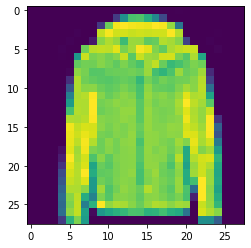

In [12]:
plt.imshow(img)

## Preprocessing the Data



In [15]:
x_test.max()

255

In [16]:
x_train=x_train/255
x_test=x_test/255

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [21]:
from keras.utils import np_utils

In [22]:
n_classes=10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model



In [27]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D

In [37]:
model = Sequential()


In [38]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


W0710 23:24:16.679070 139704250103616 deprecation_wrapper.py:119] From /home/naveen/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 23:24:16.682586 139704250103616 deprecation_wrapper.py:119] From /home/naveen/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 23:24:16.852982 139704250103616 deprecation_wrapper.py:119] From /home/naveen/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0710 23:24:16.955027 139704250103616 deprecation_wrapper.py:119] From /home/naveen/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model


In [41]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 20s 326us/step - loss: 0.2412 - acc: 0.9138
Epoch 2/5
60000/60000 [==============================] - 22s 362us/step - loss: 0.2193 - acc: 0.9222
Epoch 3/5
60000/60000 [==============================] - 21s 351us/step - loss: 0.2037 - acc: 0.9262
Epoch 4/5
60000/60000 [==============================] - 21s 356us/step - loss: 0.1885 - acc: 0.9329
Epoch 5/5
60000/60000 [==============================] - 22s 359us/step - loss: 0.1773 - acc: 0.9370


### Evaluating the Model



In [42]:
model.metrics_names=['loss','acc']

In [43]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 72us/step


[0.30912351800203325, 0.9051]

In [44]:
from sklearn.metrics import classification_report

In [45]:
pred = model.predict_classes(x_test)

In [47]:
pred

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
new_pred=np_utils.to_categorical(pred, n_classes)

In [51]:
new_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.88      0.82      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.94      1.00      0.97      1000
           6       0.72      0.78      0.75      1000
           7       0.95      0.95      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.99      0.93      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000
 samples avg       0.91      0.91      0.91     10000

